In [1]:
import pandas as pd
import pingouin as pg
import numpy as np
import seaborn as sns
import sklearn
import scikit_posthocs as sp
import statsmodels.formula.api as sfa
import statsmodels.api as sa
import os

import scipy
import neurokit2 as nk

import tqdm 


from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline



import statsmodels
import statsmodels.regression.linear_model as sm

plt.rcParams['figure.figsize'] = [15, 9]

import math

In [2]:
lstPIds = []
path = "./Data/"
for filename in os.listdir(path):
    if filename.endswith(".csv"): 
        lstPIds.append(int(filename.split("-")[0].replace("ID", "")))
    else:
        continue
lstPIds = list(set(lstPIds))
print(lstPIds)

[1, 2, 3, 5, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [4]:
dfAll

,TimeStart,BlockNumber,AdaptationStatus,NBackN,TimeEnd,Duration,IsCorrect,NBackCorrect,NBackMissed,NBackTotal,...,Flow,ECGRateValues,ECGMean,ECGStd,ECG_RMSSD,ECG_freq,EDATonic,EDARaw,EDAPhasic,PId
0,1.662020e+09,1,1,2,1.662020e+09,360.01669,0.915730,163,0,178,...,24.332205,Time 1.662020e+09 93.303035 1.662020e+09 ...,93.309054,3.863697,12.325288,HRV_ULF HRV_VLF HRV_LF HRV_HF HRV...,6.075239,6.075241,0.000002,1
2,1.662020e+09,6,1,2,1.662021e+09,360.35229,0.941463,193,0,205,...,281.058294,Time 1.662020e+09 91.835424 1.662020e+09 ...,91.839561,3.170805,10.991913,HRV_ULF HRV_VLF HRV_LF HRV_HF HRV_...,7.970107,7.970232,0.000125,1
4,1.662021e+09,4,1,2,1.662021e+09,360.05591,0.817734,166,0,203,...,272.790967,Time 1.662021e+09 92.358093 1.662021e+09 ...,92.358560,3.086569,11.093231,HRV_ULF HRV_VLF HRV_LF HRV_HF HRV...,8.826208,8.826936,0.000728,1
6,1.662022e+09,2,1,2,1.662022e+09,360.02358,0.904977,200,0,221,...,110.659419,Time 1.662022e+09 92.356115 1.662022e+09 ...,92.357864,3.467742,10.101959,HRV_ULF HRV_VLF HRV_LF HRV_HF HRV...,9.316826,9.318431,0.001604,1
8,1.662022e+09,7,2,2,1.662023e+09,360.03858,0.730159,138,3,192,...,195.645700,Time 1.662022e+09 86.714842 1.662022e+09 ...,86.723805,5.316052,18.261477,HRV_ULF HRV_VLF HRV_LF HRV_HF HRV...,9.707646,9.709179,0.001533,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.662648e+09,7,2,2,1.662648e+09,360.08251,0.877451,179,1,205,...,216.950276,Time 1.662648e+09 107.432042 1.662648e+09 ...,107.439075,4.821737,17.362934,HRV_ULF HRV_VLF HRV_LF HRV_HF HRV_...,9.732461,9.732633,0.000173,20
6,1.662649e+09,3,1,2,1.662649e+09,360.04636,0.847059,216,0,255,...,192.475213,Time 1.662649e+09 106.634432 1.662649e+09 ...,106.643237,4.210438,14.274514,HRV_ULF HRV_VLF HRV_LF HRV_HF HRV...,10.356211,10.357670,0.001459,20
8,1.662649e+09,2,1,2,1.662649e+09,360.01682,0.901818,248,0,275,...,109.661543,Time 1.662649e+09 107.733425 1.662649e+09 ...,107.739941,4.679566,15.874722,HRV_ULF HRV_VLF HRV_LF HRV_HF HRV...,10.263372,10.264708,0.001336,20
10,1.662650e+09,5,1,2,1.662650e+09,360.06204,0.888889,232,1,262,...,342.940900,Time 1.662650e+09 106.197418 1.662650e+09 ...,106.192314,4.899238,16.359198,HRV_ULF HRV_VLF HRV_LF HRV_HF HRV...,10.090248,10.089888,-0.000360,20


In [14]:
lstAll = []
for pid in tqdm.tqdm(lstPIds):
    
    dfState = pd.read_csv(f"{path}ID{pid}-state.csv")

    dfStart = dfState[dfState.State == "start"].copy()
    dfEnd = dfState[dfState.State == "end"][["Time"]].iloc[:len(dfStart)]
    dfStart = dfStart.rename(columns={"Time":"TimeStart"})
    dfStart.TimeStart = dfStart.TimeStart #+ 60
    dfStart["TimeEnd"] = dfEnd.Time.values
    del dfStart["State"]
    dfStart["Duration"] = dfStart.TimeEnd - dfStart.TimeStart
    df = dfStart[dfStart.BlockNumber != -2].copy()

    dfNBack = pd.read_csv(f"{path}ID{pid}-feedback.csv")
    dfNBack = dfNBack[dfNBack.Time != "Time"]
    correct= (dfNBack["IsCorrect"]==True).count()

    lstNBack = []
    for i, e in df.iterrows():
        dfX = dfNBack[(dfNBack.Time > e.TimeStart) & (dfNBack.Time < e.TimeEnd )]
        if (len(dfX) == 0):
            print("No Data!")
        lstNBack.append(dfX.IsCorrect.mean())
    df["IsCorrect"] = lstNBack

    lstCorrectCount = []
    lstTotalTouchCount = []
    #lstNBack = []
    for i, e in df.iterrows():
        dfX = dfNBack[(dfNBack.Time > e.TimeStart) & (dfNBack.Time <= e.TimeEnd )]
        lstCorrectCount.append(len(dfX[dfX.IsCorrect == True]))
        lstTotalTouchCount.append(len(dfX))
    
    dfSphere = pd.read_csv(f"{path}ID{pid}-sphere.csv")
    del dfSphere["Feedback"]
    
    lstMissedCount = []
    for i, e in df.iterrows():
        dfX = dfSphere[(dfSphere.Time > e.TimeStart) & (dfSphere.Time <= e.TimeEnd )].reset_index(drop=True)
        missed = 0
        for i in range(0, len(dfX)-1):
            if ((dfX.iloc[i].Type == "up") & (dfX.iloc[i+1].Type == "down")):
                if(dfX.iloc[i+1].Time-dfX.iloc[i].Time > 4):
                    missed += 1
        lstMissedCount.append(missed)
    
    df["NBackCorrect"] = lstCorrectCount
    df["NBackMissed"] = lstMissedCount
    df["NBackTotal"] = np.array(lstTotalTouchCount) + np.array(lstMissedCount)
    df["NBackAccuracy"] = df["NBackCorrect"]/df["NBackTotal"] * 100
    
    df["NBackTimePerBall"] = df["Duration"] / np.array(lstTotalTouchCount)
    
    
    # Read Flow File
    dfFlow = pd.read_csv(f"{path}ID{pid}-flow.csv")
    dfFlow["TimeNorm"] = dfFlow.Time-dfState.Time.iloc[0]

    # Read Visitor File
    #dfLiams = pd.read_csv(f"{path}ID{pid}-visitor.csv")
    #dfLiams = dfLiams.drop_duplicates(subset=['Name'])
    #dfLiams["TimeNorm"] = dfLiams.Time-dfState.Time.iloc[0]

   ## Calculate Accuracy
    lstLiamData = []
    for i, e in df.iterrows():
        dfX = dfFlow[(dfFlow.Time > e.TimeStart) & (dfFlow.Time < e.TimeEnd )]
       
        if ((len(dfX) == 0)):
            print("No Data! Liams" + str(i))
           
        lstLiamData.append(len(dfX))
        
    #lstLiamClickData.append([total, truePositive, falsePositive, trueNegatives, falseNegatives])
    #lstLiamClickData = np.array(lstLiamClickData)
    df["LiamsCountTotal"] = lstLiamData
    #df["LiamsCounTruePositive"] = lstLiamClickData[:,1]
    #df["LiamsCountFalsePositive"] = lstLiamClickData[:,2]
    #df["LiamsCountTrueNegatives"] = lstLiamClickData[:,3]
    #df["LiamsCountFalseNegatives"] = lstLiamClickData[:,4]

   # df["Accuracy"] = (df.LiamsCounTruePositive +  df.LiamsCountTrueNegatives) / df.LiamsCountTotal
    df["Flow"] = df["LiamsCountTotal"] / df.Duration * 60
    
    
    # Read ECG
    dfECG = pd.read_csv(f"{path}ID{pid}-ECG.csv")
    #if(len(dfECG[(dfECG.Value > 3000) | (dfECG.Value < -3000)]) > 0):
    #    print("ECG removed for", pid, "count:",  len(dfECG[(dfECG.Value > 3000) | (dfECG.Value < -3000)]))
    #    dfECG = dfECG[(dfECG.Value < 3000) & (dfECG.Value > -3000)]
        
    
    
    if (len(dfECG) > 0):
        
        dfECG["Clean"] = nk.ecg_clean(dfECG["Value"].values, sampling_rate=130,  method="neurokit") #biosppy
        lstECGMean = []
        lstECGRateValues = []
        #lstECGSTD = []
        lsthrv_RMSSD = []
        #lsthrv_freq =[]
        lsthrv_HRV_SDNN = []
        #lstEDARel = []
        for i,e in df.iterrows():
            dfECGX = dfECG[(dfECG.Time > e.TimeStart) & (dfECG.Time <= e.TimeEnd )].copy()
            
            if (len(dfECGX) > 0):
                #dfECGProcessed, infoX = nk.bio_process(ecg=dfX["Clean"].values, sampling_rate=130)
                peaks, info = nk.ecg_peaks(dfECGX["Clean"].values, sampling_rate=130, method="kalidas2017", correct_artifacts=True)
                hrv_time = nk.hrv_time(peaks, sampling_rate=130, show=False)
                #hrv_freq = nk.hrv_frequency(peaks, sampling_rate=130, show=False, silent=False, psd_method="lomb") #welch
                
                dfECGX["Rate"] = nk.ecg_rate(peaks, sampling_rate=130, interpolation_method="cubic", desired_length=len(dfECGX["Clean"].values))
                
                lstECGRateValues.append(dfECGX.set_index("Time")["Rate"])
                lstECGMean.append(dfECGX["Rate"].mean())
                #lstECGSTD.append(dfECGX["Rate"].std())
                lsthrv_RMSSD.append(hrv_time.HRV_RMSSD.iloc[0]) 
                lsthrv_HRV_SDNN.append(hrv_time.HRV_SDNN.iloc[0])
                #lsthrv_freq.append(hrv_freq)
            else:
                lstECGRateValues.append(np.nan)
                lstECGMean.append(np.nan)
                #lstECGSTD.append(np.nan)
                lsthrv_RMSSD.append(np.nan)
                lsthrv_HRV_SDNN.append(np.nan)
                #lsthrv_freq.append(np.nan)

        df["ECGRateValues"] = lstECGRateValues
        df["ECGMean"] = lstECGMean
        #df["ECGStd"] = lstECGSTD
        df["ECG_RMSSD"] = lsthrv_RMSSD
        df["HRV_SDNN"] = lsthrv_HRV_SDNN
        #df["ECG_freq"] = lsthrv_freq
    else:
        df["ECGRateValues"] = np.nan
        df["ECGMean"] = np.nan
        #df["ECGStd"] = np.nan
        df["ECG_RMSSD"] = np.nan 
        df["HRV_SDNN"] = np.nan
        #df["ECG_freq"] = np.nan
        
   # Read EDA
    dfEDA = pd.read_csv(f"{path}ID{pid}-EDA.csv")
    edaFs = 250  # Sampling frequency

    dfEDA.Value = (dfEDA.Value / 1000) / 25
    dfEDA["TimeNorm"] = dfEDA.Time-dfState.Time.iloc[0]
    dfEDA["EDAClean"] =  nk.eda_clean(dfEDA["Value"], sampling_rate=edaFs) #scipy.signal.medfilt(dfEDA.Value, edaFs +1)
    #sos = scipy.signal.butter(1, 0.01, btype='lowpass', analog=False, output='sos', fs=edaFs)
    #dfEDA["EDAButter"] = scipy.signal.sosfilt(sos, dfEDA["EDAMedian"])
    #signal, info=nk.eda_process(nk.standardize(dfEDA.EDAClean, sampling_rate=edaFs), sampling_rate=edaFs)
    #signal2, info = nk.eda_sympathetic(dfEDA.EDAClean, sampling_rate=edaFs, frequency_band=[0.045, 0.25], method='posada', show=False)
    signal, info=nk.eda_process(dfEDA.EDAClean, sampling_rate=edaFs)
    dfEDA["EDARaw"] = signal.EDA_Raw
    dfEDA["EDATonic"] = signal.EDA_Tonic
    dfEDA["EDAPhasic"] = signal.EDA_Phasic
    #dfEDA["EDASCR"] = signal.SCR_Amplitude
    #dfEDA["EDASymp"] = signal2.EDA_Symp
    
    
    lstEDATonic = []
    lstEDARaw = []
    lstEDAMedian = []
    lstEDAButter = []
    lstEDAPhasic = []
    #lstEDASCR = []
    #lstEDAFre = []
    
    for i, e in df.iterrows():
        dfX = dfEDA[(dfEDA.Time > e.TimeStart) & (dfEDA.Time < e.TimeEnd )]
        lstEDATonic.append(dfX.EDATonic.mean())
        lstEDARaw.append(dfX.EDARaw.mean())
        lstEDAPhasic.append(dfX.EDAPhasic.mean())
        #lstEDASCR.append(dfX.EDASCR.mean())
        #lstEDAFre.append(dfX.EDAFre.mean())
        #lstEDAMedian.append(dfX.EDAClean.mean())
        #lstEDAButter.append(dfX.EDAButter.mean())

    df["EDATonic"] = lstEDATonic
    df["EDARaw"] = lstEDARaw
    df["EDAPhasic"] = lstEDAPhasic
    #df["EDASCR"] = lstEDASCR
    #df["EDAClean"] = lstEDAClean
    #df["EDAButter"] = lstEDAButter
   # dfEDA["EDASymp"] = lstEDASymp
    df["PId"] = pid
    lstAll.append(df)
    
dfAll = pd.concat(lstAll)


 18%|██████████████▋                                                                    | 3/17 [00:10<00:48,  3.45s/it]C:\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:277: RuntimeWarning: divide by zero encountered in true_divide
  mrrs /= th2
C:\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:277: RuntimeWarning: invalid value encountered in true_divide
  mrrs /= th2
C:\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:277: RuntimeWarning: divide by zero encountered in true_divide
  mrrs /= th2
C:\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:277: RuntimeWarning: invalid value encountered in true_divide
  mrrs /= th2
C:\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:277: RuntimeWarning: divide by zero encountered in true_divide
  mrrs /= th2
C:\Python310\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:277: RuntimeWarning: invalid value encountered in true_divide
  mrrs /= th2
C:\Python310\lib\sit

In [15]:
dfAll


,TimeStart,BlockNumber,AdaptationStatus,NBackN,TimeEnd,Duration,IsCorrect,NBackCorrect,NBackMissed,NBackTotal,...,LiamsCountTotal,Flow,ECGRateValues,ECGMean,ECG_RMSSD,HRV_SDNN,EDATonic,EDARaw,EDAPhasic,PId
0,1.662020e+09,1,1,2,1.662020e+09,360.01669,0.915730,163,0,178,...,146,24.332205,Time 1.662020e+09 93.303035 1.662020e+09 ...,93.309054,12.325288,26.722732,6.075239,6.075241,0.000002,1
2,1.662020e+09,6,1,2,1.662021e+09,360.35229,0.941463,193,0,205,...,1688,281.058294,Time 1.662020e+09 91.835424 1.662020e+09 ...,91.839561,10.991913,22.511028,7.970107,7.970232,0.000125,1
4,1.662021e+09,4,1,2,1.662021e+09,360.05591,0.817734,166,0,203,...,1637,272.790967,Time 1.662021e+09 92.358093 1.662021e+09 ...,92.358560,11.093231,21.621402,8.826208,8.826936,0.000728,1
6,1.662022e+09,2,1,2,1.662022e+09,360.02358,0.904977,200,0,221,...,664,110.659419,Time 1.662022e+09 92.356115 1.662022e+09 ...,92.357864,10.101959,24.516516,9.316826,9.318431,0.001604,1
8,1.662022e+09,7,2,2,1.662023e+09,360.03858,0.730159,138,3,192,...,1174,195.645700,Time 1.662022e+09 86.714842 1.662022e+09 ...,86.723805,18.261477,43.162670,9.707646,9.709179,0.001533,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.662648e+09,7,2,2,1.662648e+09,360.08251,0.877451,179,1,205,...,1302,216.950276,Time 1.662648e+09 107.432042 1.662648e+09 ...,107.439075,17.362934,26.056817,9.732461,9.732633,0.000173,20
6,1.662649e+09,3,1,2,1.662649e+09,360.04636,0.847059,216,0,255,...,1155,192.475213,Time 1.662649e+09 106.634432 1.662649e+09 ...,106.643237,14.274514,22.700434,10.356211,10.357670,0.001459,20
8,1.662649e+09,2,1,2,1.662649e+09,360.01682,0.901818,248,0,275,...,658,109.661543,Time 1.662649e+09 107.733425 1.662649e+09 ...,107.739941,15.874722,25.110479,10.263372,10.264708,0.001336,20
10,1.662650e+09,5,1,2,1.662650e+09,360.06204,0.888889,232,1,262,...,2058,342.940900,Time 1.662650e+09 106.197418 1.662650e+09 ...,106.192314,16.359198,26.579161,10.090248,10.089888,-0.000360,20


In [16]:
for col in dfAll.columns:
    print(col)

TimeStart
BlockNumber
AdaptationStatus
NBackN
TimeEnd
Duration
IsCorrect
NBackCorrect
NBackMissed
NBackTotal
NBackAccuracy
NBackTimePerBall
LiamsCountTotal
Flow
ECGRateValues
ECGMean
ECG_RMSSD
HRV_SDNN
EDATonic
EDARaw
EDAPhasic
PId


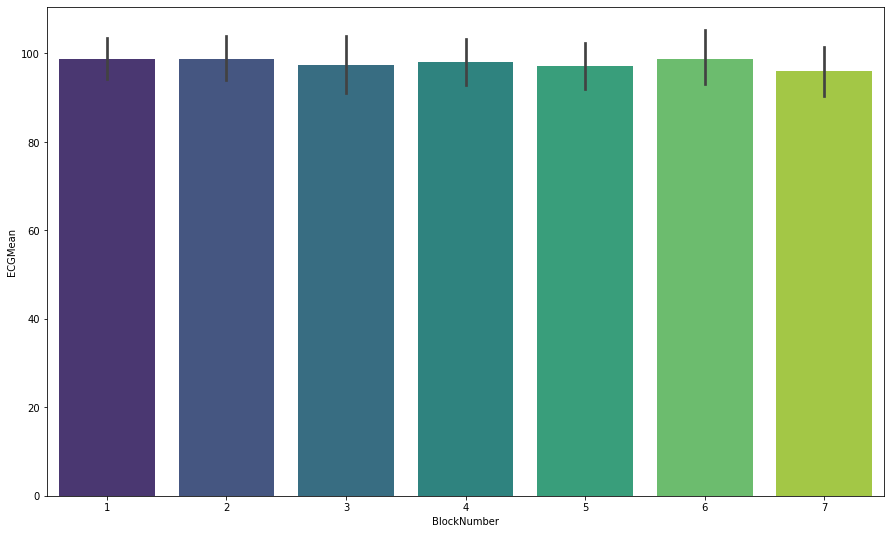

In [26]:
f = sns.barplot(x=dfAll['BlockNumber'], y=dfAll['ECGMean'], palette="viridis")


In [20]:
df1 = dfAll[dfAll['BlockNumber']==6]
df2 = dfAll[dfAll['BlockNumber']==7]

In [23]:
df2

,TimeStart,BlockNumber,AdaptationStatus,NBackN,TimeEnd,Duration,IsCorrect,NBackCorrect,NBackMissed,NBackTotal,...,LiamsCountTotal,Flow,ECGRateValues,ECGMean,ECG_RMSSD,HRV_SDNN,EDATonic,EDARaw,EDAPhasic,PId
8,1.662022e+09,7,2,2,1.662023e+09,360.03858,0.730159,138,3,192,...,1174,195.645700,Time 1.662022e+09 86.714842 1.662022e+09 ...,86.723805,18.261477,43.162670,9.707646,9.709179,0.001533,1
2,1.662028e+09,7,2,2,1.662028e+09,360.03584,0.758278,229,1,303,...,1564,260.640718,Time 1.662028e+09 89.929923 1.662028e+09 ...,89.943769,26.725388,54.011646,13.326752,13.326959,0.000207,2
10,1.662038e+09,7,2,2,1.662038e+09,360.03653,0.772455,129,0,167,...,1261,210.145343,Time 1.662038e+09 76.756872 1.662038e+09 ...,76.757476,26.435651,50.734157,5.959207,5.962322,0.003115,3
8,1.662116e+09,7,2,2,1.662116e+09,360.05683,0.750958,196,0,261,...,1456,242.628365,Time 1.662116e+09 111.743072 1.662116e+09 ...,111.756994,17.481054,51.360175,3.937747,3.937824,0.000076,5
12,1.662124e+09,7,2,2,1.662125e+09,360.04206,0.891791,239,0,268,...,1110,184.978388,Time 1.662124e+09 115.894493 1.662124e+09 ...,115.913936,22.967514,46.735206,9.339827,9.341226,0.003584,6
10,1.662369e+09,7,2,2,1.662369e+09,360.04438,0.828794,213,0,257,...,1334,222.305928,Time 1.662369e+09 85.179407 1.662369e+09 ...,85.203065,30.469886,72.461201,3.955834,3.957781,0.001946,7
2,1.662381e+09,7,2,2,1.662381e+09,360.32816,0.735000,147,0,200,...,1557,259.263667,Time 1.662381e+09 109.009317 1.662381e+09 ...,109.010929,9.447528,22.246468,1.202079,1.202040,-0.000039,9
6,1.662461e+09,7,2,2,1.662461e+09,360.05545,0.919786,344,0,374,...,1346,224.298785,Time 1.662461e+09 96.70386 1.662461e+09 ...,96.695159,11.248062,25.378771,8.220354,8.223831,0.003477,11
4,1.662467e+09,7,2,2,1.662468e+09,360.02476,0.855721,172,0,201,...,878,146.323270,Time 1.662467e+09 103.421728 1.662467e+09 ...,103.426186,10.679024,18.640674,3.152030,3.152060,0.000030,12
12,1.662477e+09,7,2,2,1.662478e+09,360.05079,0.682353,58,23,108,...,1199,199.805144,Time 1.662477e+09 91.338414 1.662477e+09 ...,91.352811,25.990156,41.383662,4.591429,4.592895,0.001571,13


In [25]:
scipy.stats.ttest_ind(df1['ECGMean'],df2['ECGMean'])


Ttest_indResult(statistic=0.6155629347786308, pvalue=0.5425366773734137)